In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Getting Started
#### Title : Lung Cancer Prediction
#### Lung Cancer Status :


0 -- > YES

1 -- > NO

# DataFraming
#### Read .csv file into pandas

In [4]:
dataset = pd.read_csv("survey lung cancer.csv")

In [6]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
dataset.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


# Exploratory data analysis

In [12]:
print(dataset.shape)
print(dataset.dtypes)

(309, 16)
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [16]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Checking Duplicates

In [19]:
dataset.duplicated().sum()

33

## Dropping Duplicates

In [22]:
dataset = dataset.drop_duplicates()

## Data Visualization

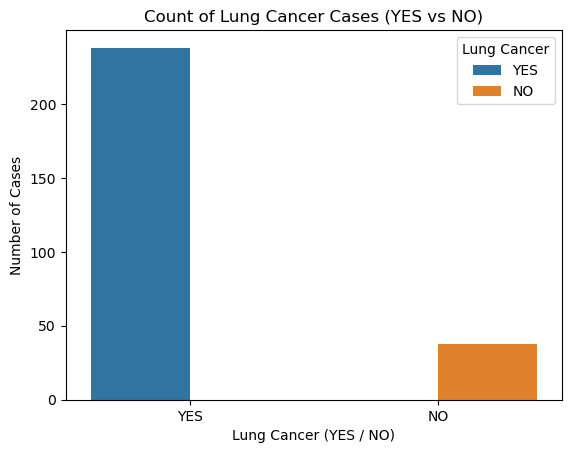

In [25]:
sns.countplot(x='LUNG_CANCER',hue='LUNG_CANCER',data=dataset)
plt.title('Count of Lung Cancer Cases (YES vs NO)')
plt.xlabel('Lung Cancer (YES / NO)')
plt.ylabel('Number of Cases')
plt.legend(title='Lung Cancer')
plt.show()

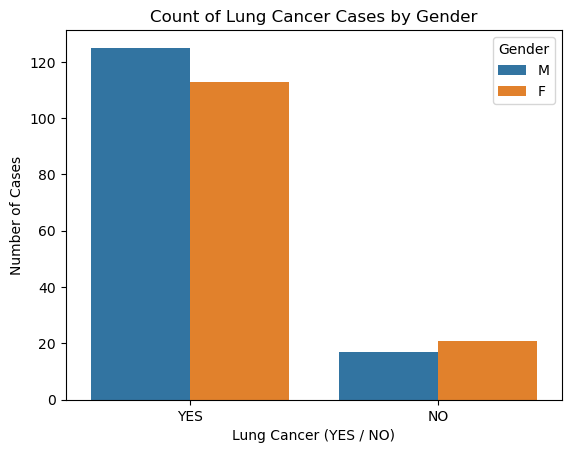

In [27]:
sns.countplot(x='LUNG_CANCER',hue='GENDER',data = dataset)
plt.title('Count of Lung Cancer Cases by Gender')
plt.xlabel('Lung Cancer (YES / NO)')
plt.ylabel('Number of Cases')
plt.legend(title='Gender')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


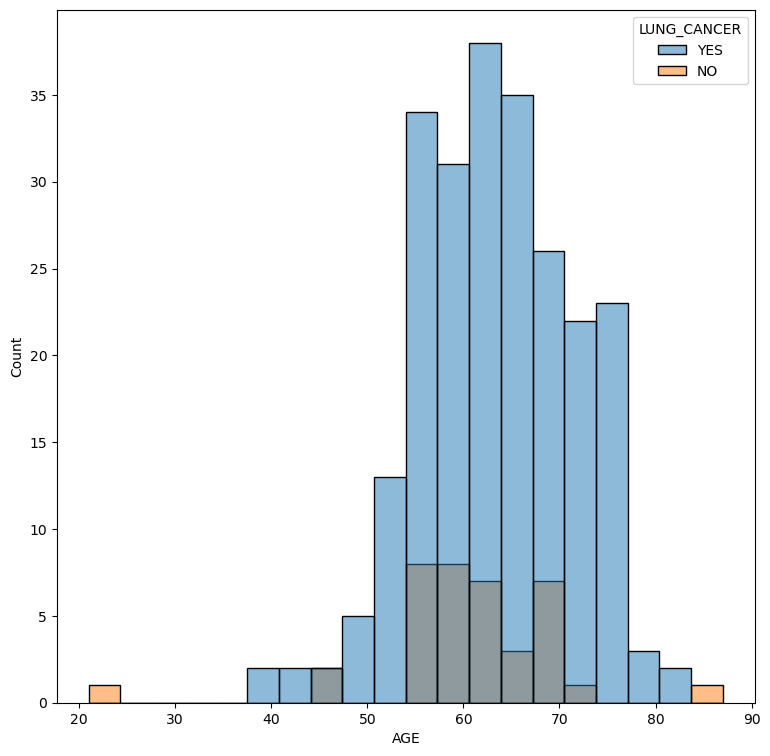

In [29]:
plt.figure(figsize=(9,9))
sns.histplot(dataset[['AGE', 'LUNG_CANCER']], x = "AGE", hue="LUNG_CANCER")
plt.title("")
plt.show()

## Encoding



In [32]:
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].map({'YES': 0, 'NO': 1})
print(dataset['LUNG_CANCER'].value_counts())
dataset['GENDER'] = dataset['GENDER'].map({'M': 0, 'F': 1})
print(dataset['GENDER'].value_counts())

LUNG_CANCER
0    238
1     38
Name: count, dtype: int64
GENDER
0    142
1    134
Name: count, dtype: int64


In [34]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,2,2,2,1,1,2,2,1,2,1,2,1,0
280,1,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1
281,0,55,2,1,1,1,1,2,2,1,1,1,2,1,2,1
282,0,46,1,2,2,1,1,1,1,1,1,1,1,2,2,1


In [36]:
dataset.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.485507,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,0.137681
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


C:\Users\NEELANSHA\AppData\Local\Temp\ipykernel_11060\1477196350.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NEELANSHA\AppData\Local\Temp\ipykernel_11060\1477196350.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

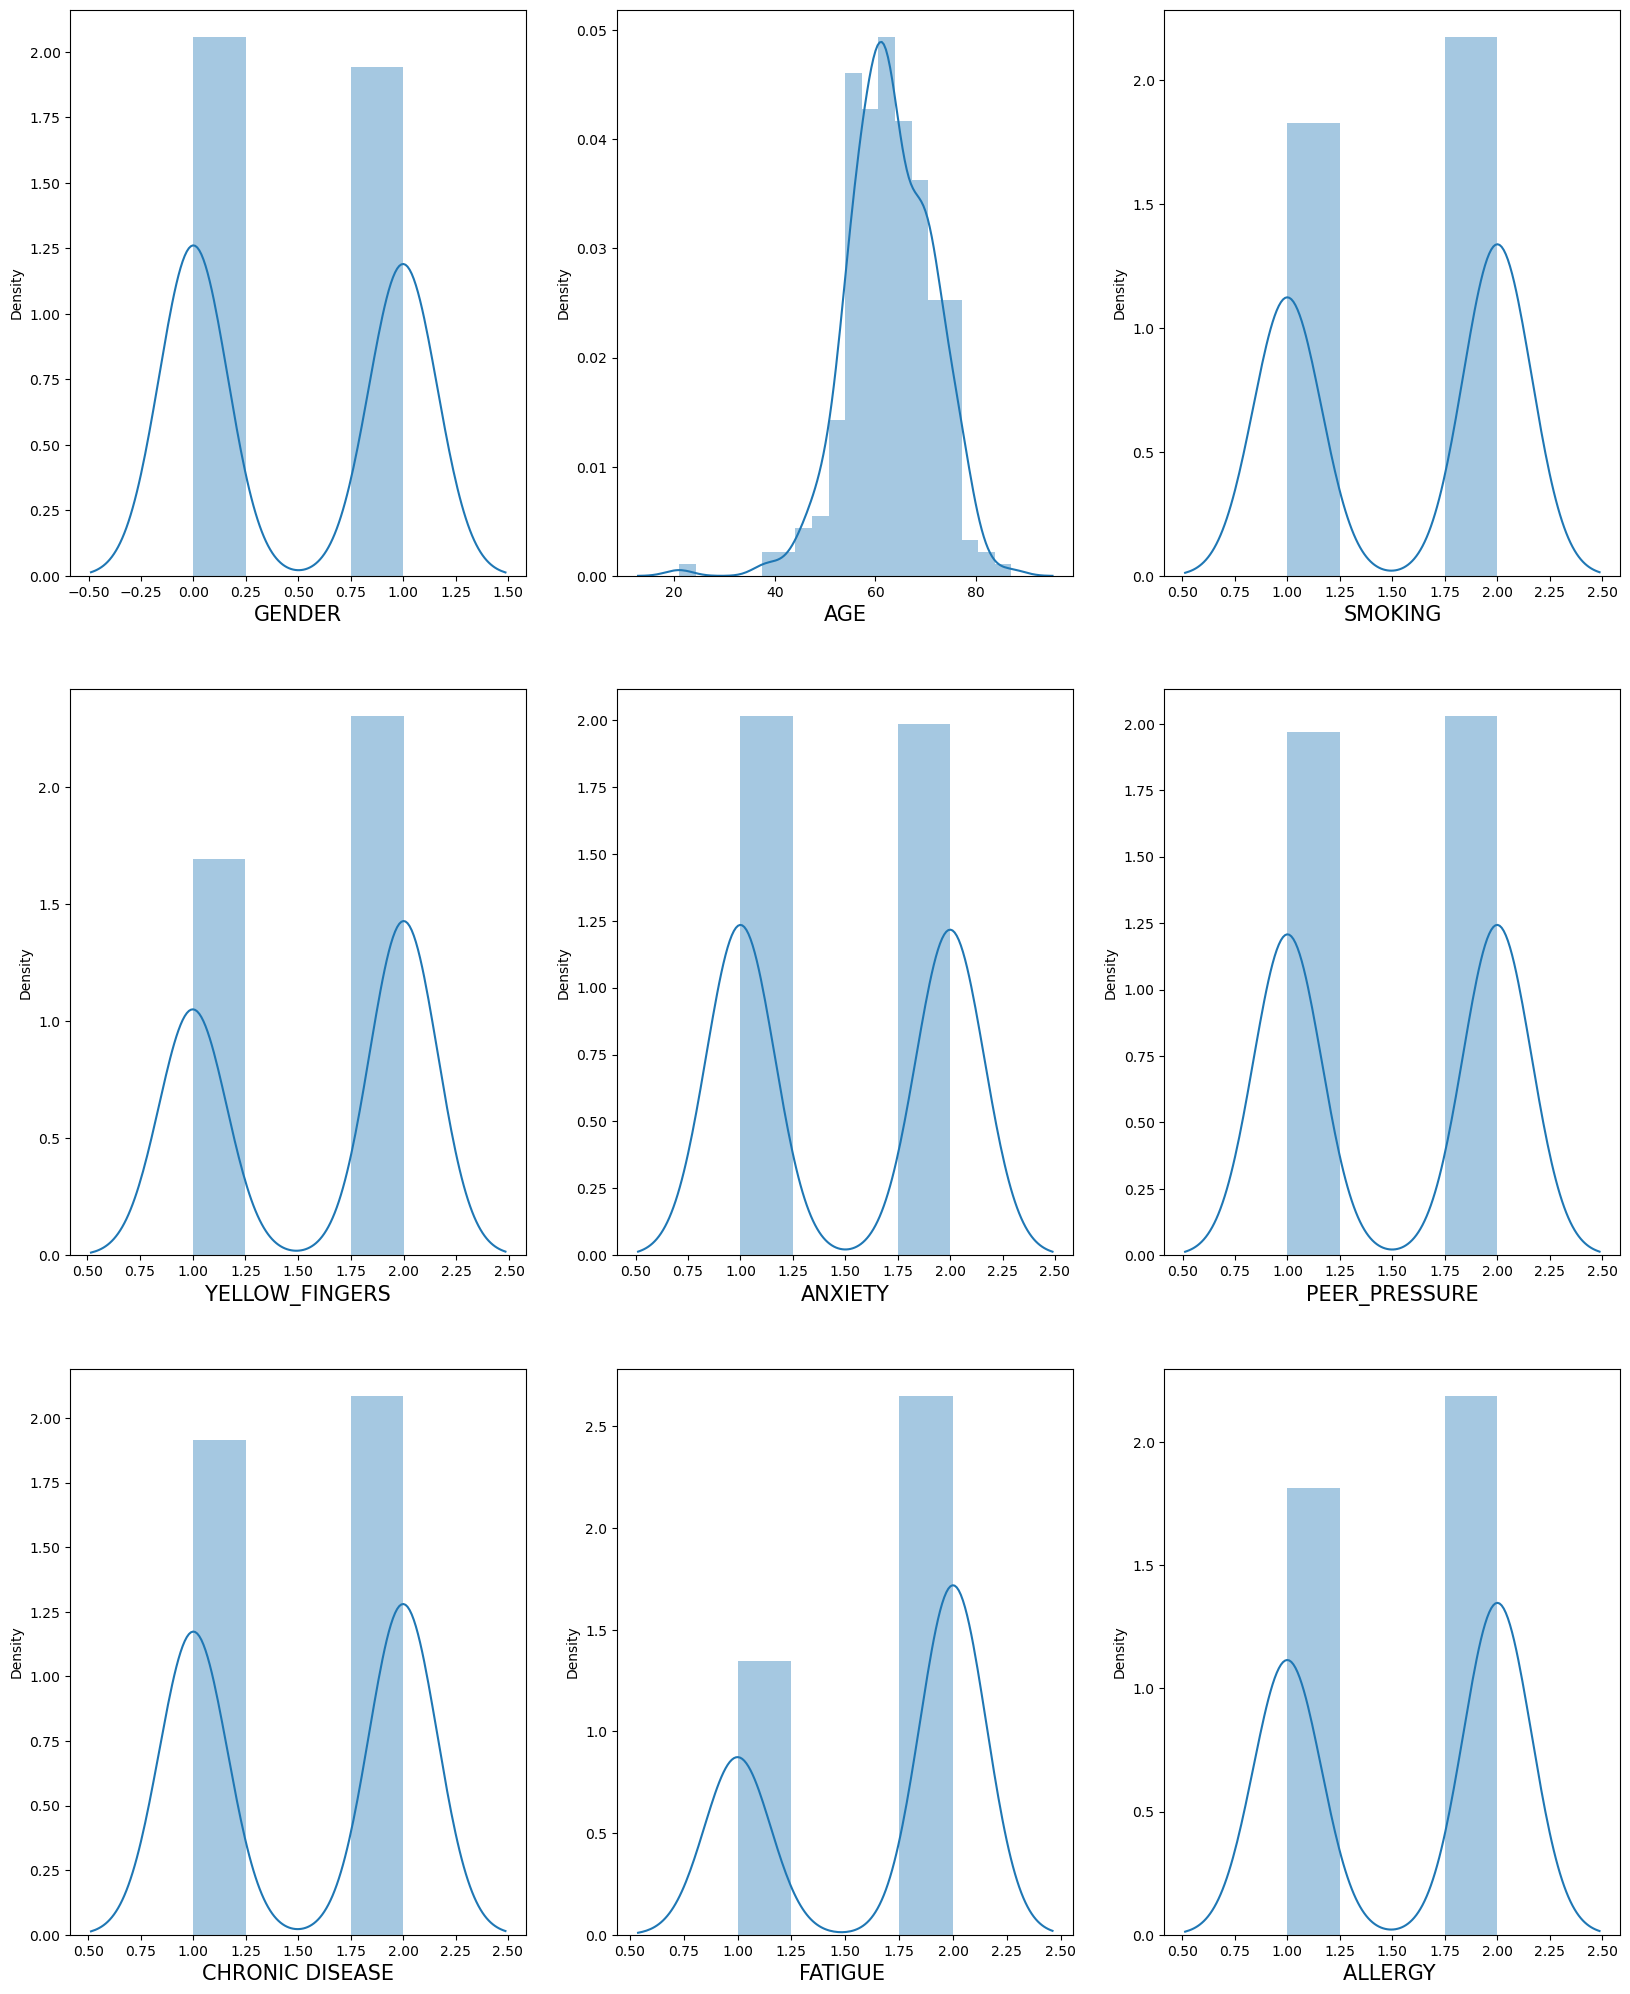

In [38]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in dataset:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

## Find Correlations in Data Set

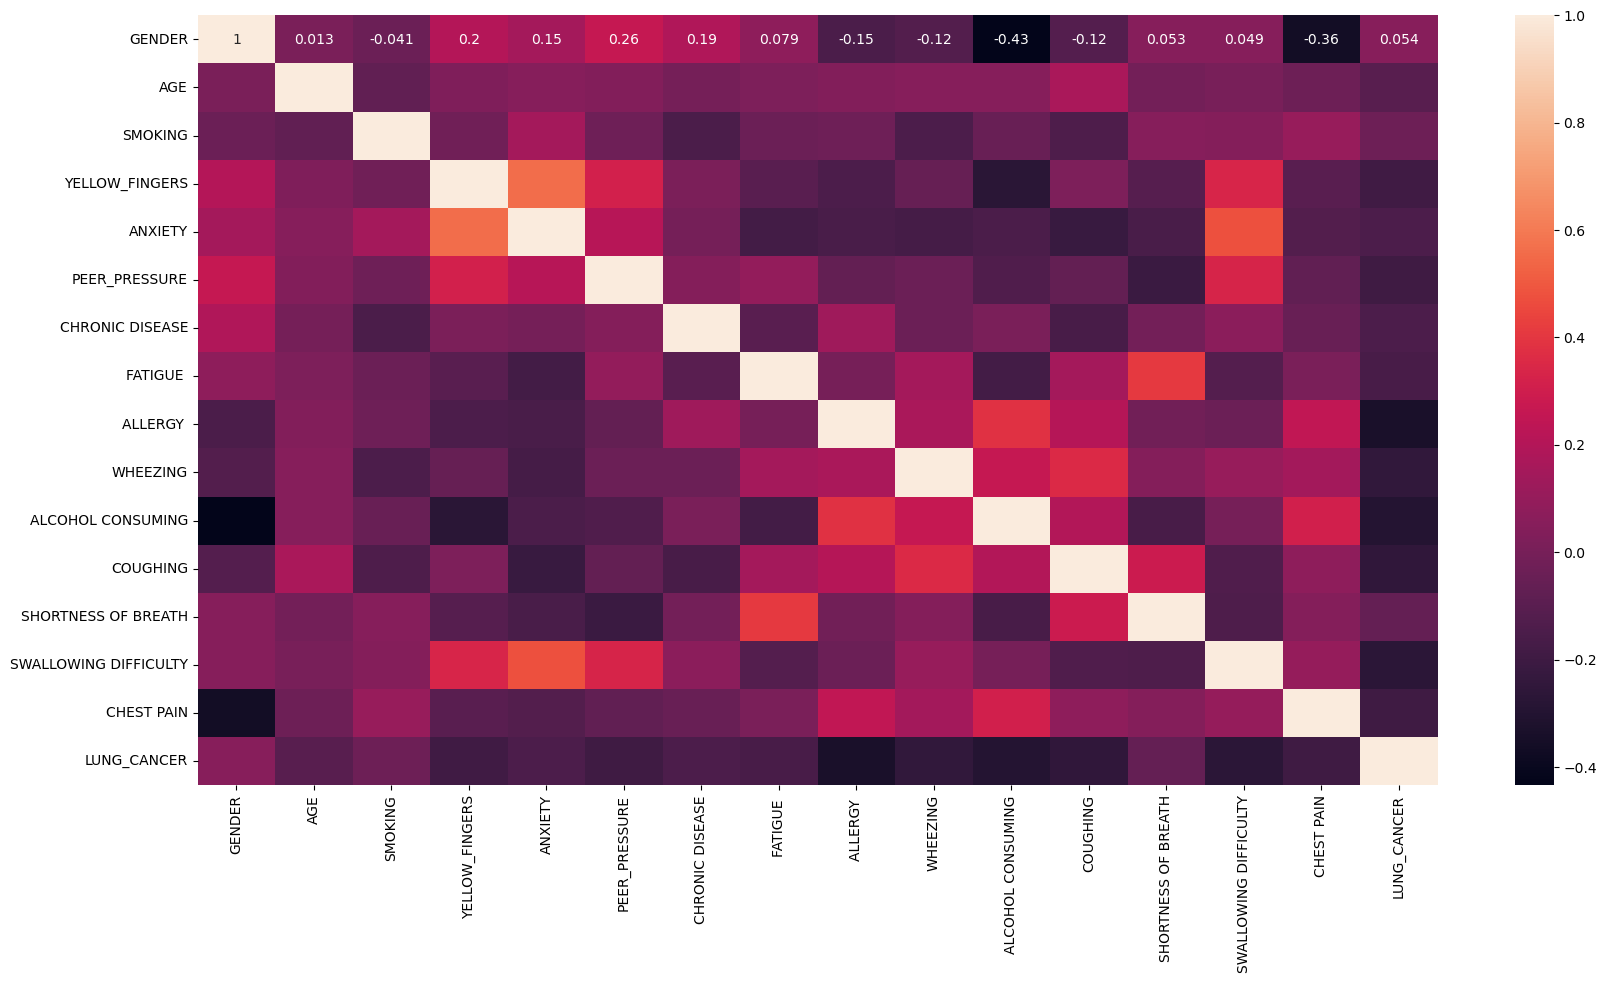

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True);
plt.show()

# Model Preparation

Spilt into X & Y


In [42]:
X = dataset.drop(columns=['LUNG_CANCER'],axis=1)
Y = dataset['LUNG_CANCER']

In [44]:
print("The shape of X is " , X.shape)
print("The shape of Y is " , Y.shape)

The shape of X is  (276, 15)
The shape of Y is  (276,)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)

Shape of X_train is  (220, 15)
Shape of X_test  is  (56, 15)
Shape of Y_train is  (220,)
Shape of Y_test  is  (56,)


In [50]:
print(Y_train.value_counts())
print(Y_test.value_counts())

LUNG_CANCER
0    190
1     30
Name: count, dtype: int64
LUNG_CANCER
0    48
1     8
Name: count, dtype: int64


# Feature Scalilng 

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.04653624,  0.48957626,  0.94686415, ..., -1.26025208,
        -0.94686415, -1.08545743],
       [-0.95553309,  1.21082701, -1.05611771, ...,  0.79349205,
         1.05611771,  0.92127059],
       [ 1.04653624, -0.23167448,  0.94686415, ...,  0.79349205,
         1.05611771,  0.92127059],
       ...,
       [ 1.04653624,  1.09061855,  0.94686415, ...,  0.79349205,
         1.05611771,  0.92127059],
       [ 1.04653624, -0.71250831, -1.05611771, ..., -1.26025208,
        -0.94686415, -1.08545743],
       [ 1.04653624, -1.19334214, -1.05611771, ...,  0.79349205,
        -0.94686415, -1.08545743]])

In [55]:
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier(n_estimators = 100)
rForest.fit(X_train,Y_train)
Y_pred = rForest.predict(X_test)

In [57]:
rForest.feature_importances_

array([0.04758722, 0.21465633, 0.03601897, 0.05837376, 0.04087084,
       0.07650087, 0.06856427, 0.05769449, 0.07619891, 0.05351952,
       0.08712945, 0.04983161, 0.03968954, 0.05645399, 0.03691021])

In [59]:
features = dataset.columns.values.tolist()[0:15]
feature_pro = pd.Series(rForest.feature_importances_,index=features).sort_values(ascending=False)

In [61]:
feature_pro 

AGE                      0.214656
ALCOHOL CONSUMING        0.087129
PEER_PRESSURE            0.076501
ALLERGY                  0.076199
CHRONIC DISEASE          0.068564
YELLOW_FINGERS           0.058374
FATIGUE                  0.057694
SWALLOWING DIFFICULTY    0.056454
WHEEZING                 0.053520
COUGHING                 0.049832
GENDER                   0.047587
ANXIETY                  0.040871
SHORTNESS OF BREATH      0.039690
CHEST PAIN               0.036910
SMOKING                  0.036019
dtype: float64

# Feature Importances Vizualizing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


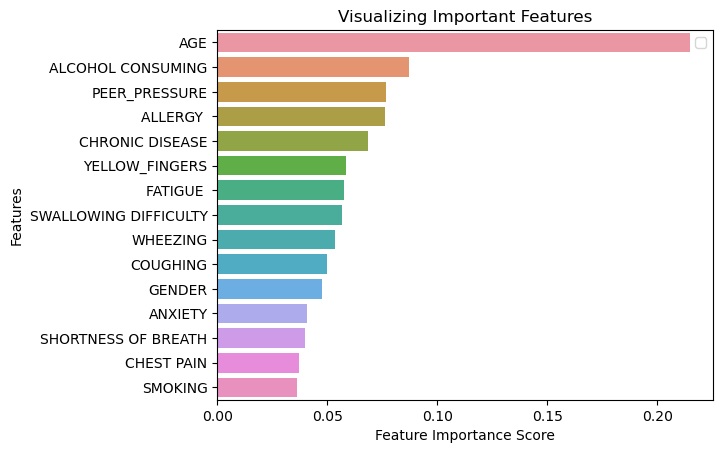

In [64]:
sns.barplot(x=feature_pro, y=feature_pro.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Model Training

#### We will train different model after the evaluation of model we will select out best model for production.


1. Logistic Regression


2. KNN


3. SVC


4. Decision Tree


5. Random Forest Regressor


6. XgBoost


7. Gradient Boosting

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.9363636363636364
Test Accuracy of Logistic Regression Model is 0.9464285714285714


In [71]:
confusion_matrix(Y_test, Y_pred)

array([[48,  0],
       [ 3,  5]], dtype=int64)

In [73]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.62      0.77         8

    accuracy                           0.95        56
   macro avg       0.97      0.81      0.87        56
weighted avg       0.95      0.95      0.94        56



## SVC

In [76]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)

Y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.9545454545454546
Test Accuracy of SVC Model is 0.9107142857142857


In [78]:
confusion_matrix(Y_test, Y_pred)

array([[46,  2],
       [ 3,  5]], dtype=int64)

In [80]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.71      0.62      0.67         8

    accuracy                           0.91        56
   macro avg       0.83      0.79      0.81        56
weighted avg       0.91      0.91      0.91        56



## DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 0.9954545454545455
Test Accuracy of Decision Tree Model is 0.8571428571428571


In [85]:
confusion_matrix(Y_test, Y_pred)

array([[44,  4],
       [ 4,  4]], dtype=int64)

In [87]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        48
           1       0.50      0.50      0.50         8

    accuracy                           0.86        56
   macro avg       0.71      0.71      0.71        56
weighted avg       0.86      0.86      0.86        56



#### Hyper parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [91]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 7}
0.8863636363636364


In [92]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.9181818181818182
Test Accuracy of Decesion Tree Model is 0.875


#### Visualization of DTC 

[Text(0.66875, 0.9166666666666666, 'x[8] <= -0.073\ngini = 0.236\nsamples = 220\nvalue = [190, 30]'),
 Text(0.4375, 0.75, 'x[13] <= 0.055\ngini = 0.38\nsamples = 102\nvalue = [76, 26]'),
 Text(0.225, 0.5833333333333334, 'x[7] <= -0.283\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.1, 0.4166666666666667, 'x[6] <= -0.055\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.05, 0.25, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.15, 0.25, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.35, 0.4166666666666667, 'x[3] <= -0.175\ngini = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(0.25, 0.25, 'x[10] <= -0.138\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.45, 0.25, 'x[9] <= -0.128\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),


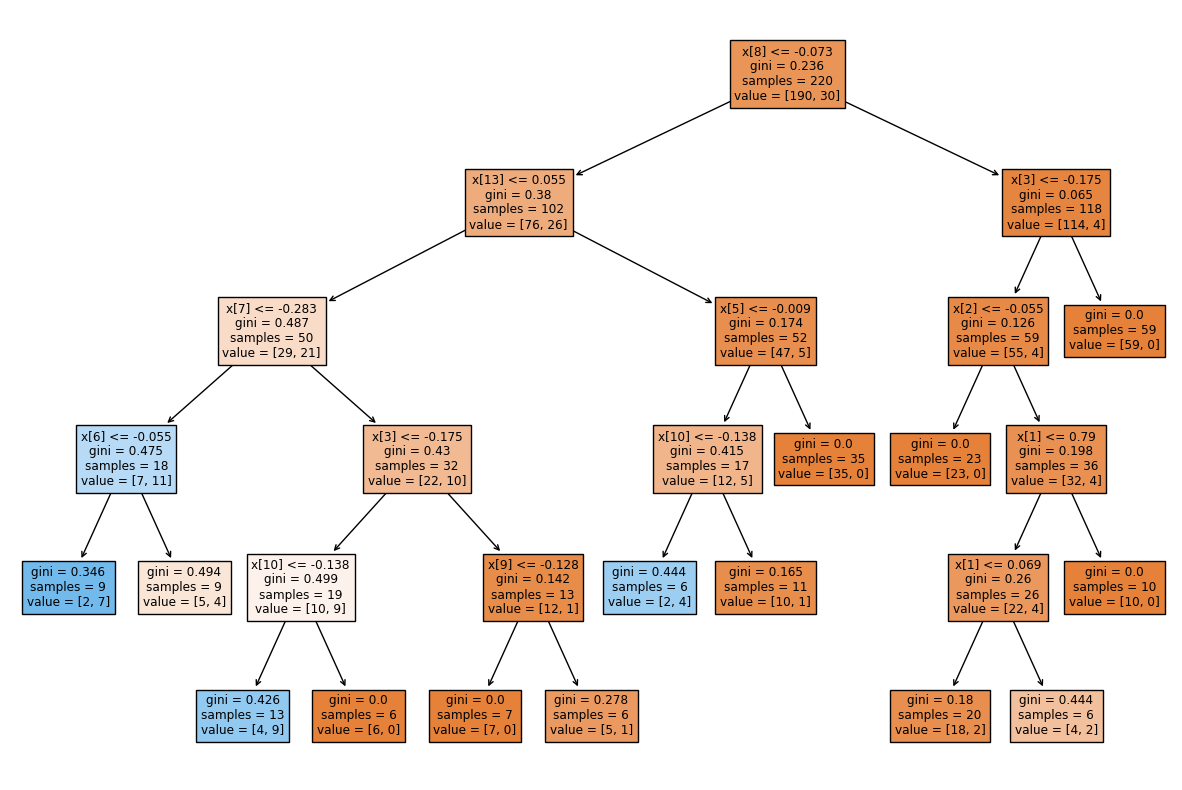

In [94]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [95]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

## Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, Y_train)

Y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8636363636363636
Test Accuracy of Random Forest Model is 0.8571428571428571


## KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=16)
kfitModel = k_model.fit(X_train, Y_train)

kX_train_prediction = kfitModel.predict(X_train)
training_data_accuray = accuracy_score(kX_train_prediction,Y_train)
print('Accuracy on training data  : ', training_data_accuray)

kX_test_prediction = kfitModel.predict(X_test)
kx_lgr_test_data_accuray = accuracy_score(kX_test_prediction,Y_test)
print('Accuracy on test data      : ', kx_lgr_test_data_accuray)

Accuracy on training data  :  0.8863636363636364
Accuracy on test data      :  0.8928571428571429


## GradientBoostingClassifier

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [109]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.8772727272727273


In [110]:
gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gb.fit(X_train, Y_train)

Y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(Y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9954545454545455
Test Accuracy of Gradient Boosting Classifier Model is 0.9107142857142857


## XGB Classifier

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

Training Accuracy of XGB Model is 0.9363636363636364
Test Accuracy of XGB Model is 0.9285714285714286


In [117]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost']
scores = [lr_test_acc, kx_lgr_test_data_accuray, svc_test_acc, dtc_test_acc, rand_clf_test_acc, gb_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.946429
6,XgBoost,0.928571
2,SVC,0.910714
5,Gradient Boosting,0.910714
1,KNN,0.892857
3,Decision Tree,0.875000
4,Random Forest,0.857143


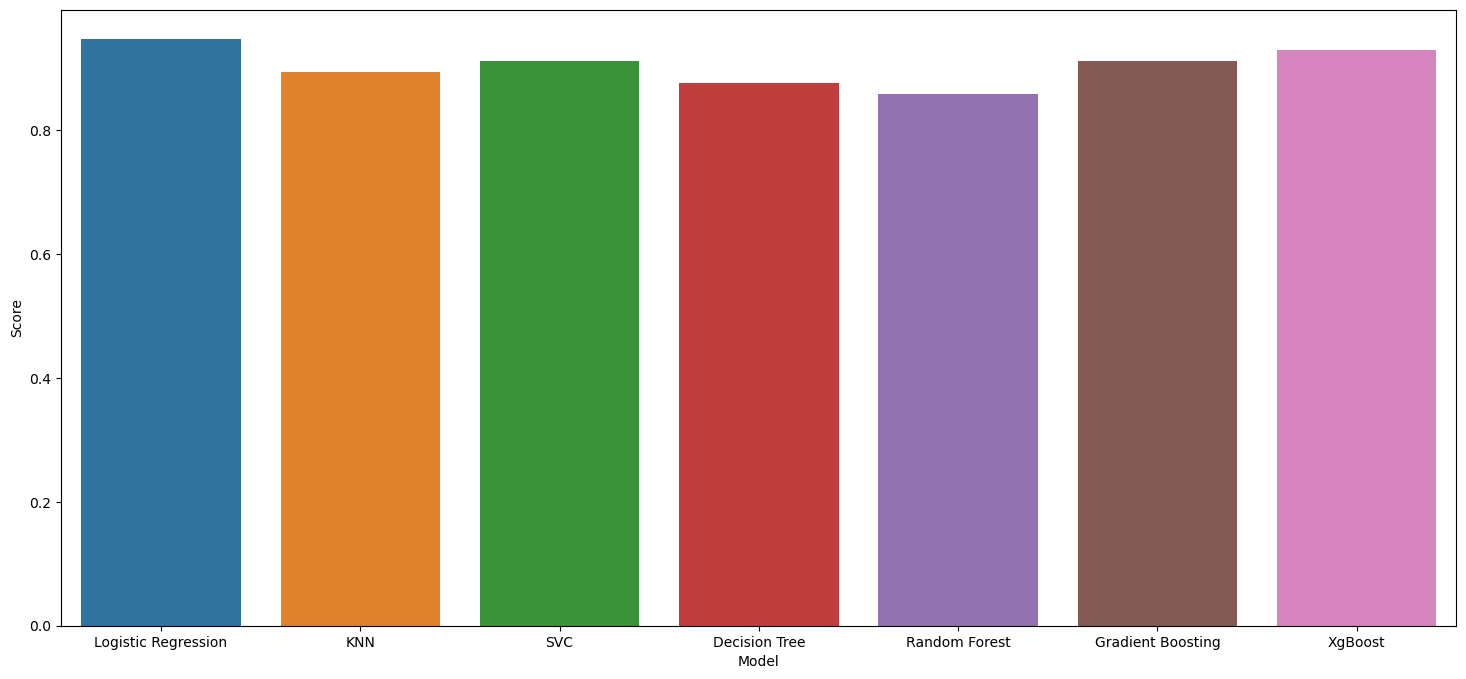

In [119]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

# Logistic Regression gives us the best result so we will save this model for production.

In [122]:
import pickle

In [124]:
filename = 'LungCancer_model.sav'
pickle.dump(models, open(filename, 'wb'))

In [126]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,Model,Score
0,Logistic Regression,0.946429
1,KNN,0.892857
2,SVC,0.910714
3,Decision Tree,0.875000
4,Random Forest,0.857143
5,Gradient Boosting,0.910714
6,XgBoost,0.928571


# Create Pickle File for Logistic Regression Model

In [129]:
import pickle
pickle.dump(lr, open('Lung_Cancer.pkl', 'wb'))

In [131]:
model = open('Lung_Cancer.pkl','rb')
logistic = pickle.load(model)

In [133]:
y_prediction = logistic.predict(X_test)

In [135]:
lr_acc = accuracy_score(Y_test, y_prediction)

In [137]:
lr_acc

0.9464285714285714

#### So this will Verify that Our Imported Pickle file provides the desired out put for the Lung Cancer Dataset for Prdiction Purpose

In [140]:
import numpy as np

#Non Lung Cancer Patinet 
X_New = [0,45,0,1,1,0,0,0,1,0,0,1,1,0,0] 
X_New = np.reshape(X_New, (1, -1))

y_New = logistic.predict(X_New)


#Lung Cancer Patinet 
X_2 = [0,55,0,1,1,1,1,2,1,1,2,1,1,2,2] 
X_2 = np.reshape(X_2, (1, -1))

y_2 = logistic.predict(X_2)

In [142]:
if y_New == 0:
    print("Patinet Has Lung Cancer")
else:
    print("Patinet Doesn't Got Lung Cancer")

Patinet Doesn't Got Lung Cancer


In [144]:
if y_2 == 0:
    print("Patinet Have Lung Cancer")
else:
    print("Patinet Doesn't Got Lung Cancer")

Patinet Have Lung Cancer
